In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def value(cost):
    x = 4.5
    res = 70
    step = 25
    factor = 0.9
    while x < cost:
        step *= factor
        res += step
        x += 0.5
    return res

# These are set manually. Can be experimented with.
PMAX = {'d': 300, 'm': 400, 'f': 400}
PMIN = {'d': 100, 'm': 70,  'f': 80}
TAU  = {'d': 0.2, 'm': 0.1, 'f': 0.1}
OFFS = {'d': 4.5, 'm': 4.5, 'f': 5.5}


def expgrowth(x, t):
    val = (PMAX[t] - PMIN[t]) * np.exp( - TAU[t] * (x - OFFS[t]))
    res = PMAX[t] - val
    der = TAU[t] * val
    return res, der


def mfunc(arr, ptype):
    res = 0
    der = np.zeros_like(arr)
    for i, x in enumerate(arr):
        a, b = expgrowth(x, ptype[i])
        res += a
        der[i] = b
    return -res, -der

 4.5  100   46
 5.0  119   64
 5.5  136   80
 6.0  152   96
 6.5  166  110
 7.0  179  125
 7.5  190  138
 8.0  201  151
 8.5  210  163
 9.0  219  174
 9.5  226  185
10.0  233  196
10.5  240  206
11.0  245  215
11.5  251  224
12.0  255  233
12.5  260  241
13.0  263  249


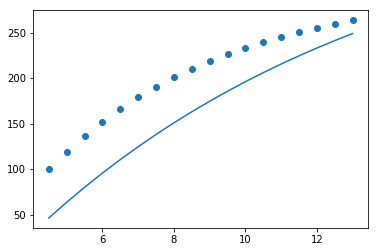

In [3]:
## Compare exponential growth and value function

xvals = np.arange(4.5, 13.1, 0.5)
yvals1 = np.zeros_like(xvals)
yvals2 = np.zeros_like(xvals)
for i, x in enumerate(xvals):
    #yvals1[i] = value(x)
    yvals1[i] = expgrowth(x, 'd')[0]
    yvals2[i] = expgrowth(x, 'f')[0]
    print("{:4.1f} {:4.0f} {:4.0f}".format(x, yvals1[i], yvals2[i]))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xvals, yvals1)
ax1.plot(xvals, yvals2)
plt.show()

In [54]:
ngfix = 1
pgfix = 8.5
ndfix = 1
pdfix = 6.0
nmfix = 2
pmfix = 17
nffix = 0
pffix = 0
pbench = 14
nfix = ngfix + ndfix + nmfix + nffix
pfix = pgfix + pdfix + pmfix + pffix
n = 11 - nfix
cmax = 100 - pfix - pbench

xinit = np.repeat(5, n)
def get_bounds(f):
    bounds = [[4.5, 6.5]] * min(2, f[0]) \
           + [[4.5, 6.0]] * min(2, (f[0] - 2)) \
           + [[4.5, 5.5]] * max(0, (f[0] - 4)) \
           + [[5.5, 13]] * min(1, f[1]) \
           + [[5.5, 11]] * min(1, (f[1] - 1)) \
           + [[5.5, 10.5]] * min(2, (f[1] - 2)) \
           + [[5.5, 10.0]] * max(0, (f[1] - 4)) \
           + [[6.5, 12.5]] * min(1, f[2]) \
           + [[6.5, 11]] * (f[2] - 1)
    return bounds

fmin = 0 if nffix > 0 else 1
options = [[d, n - a - d, a] for a in range(fmin, 4 - nffix) for d in range(3 - ndfix, 6 - ndfix) if a + d >= 5 - nffix - ndfix ]

In [55]:
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([np.sum(x) - cmax]),
           'jac' : lambda x: np.repeat(1.0, n)}


for form in options:
    #print(form)
    args = ['d'] * form[0] + ['m'] * form[1] + ['f'] * form[2]
    bounds = get_bounds(form)
    #print(bounds)
    #print(args)
    res = minimize(mfunc, xinit, args = args, method='SLSQP', jac=True,
                   constraints=[eq_cons], options={'ftol': 1e-9, 'disp': False},
                   bounds=bounds)
    print (form, -res.fun, ['{:4.1f}'.format(x) for x in res.x])

[3, 3, 1] 1216.57383439 [' 6.5', ' 6.5', ' 6.0', ' 8.7', ' 8.7', ' 8.7', ' 9.4']
[4, 2, 1] 1241.20696524 [' 6.5', ' 6.5', ' 6.0', ' 6.0', ' 9.6', ' 9.6', '10.3']
[2, 3, 2] 1171.81790191 [' 6.5', ' 6.5', ' 8.0', ' 8.0', ' 8.0', ' 8.7', ' 8.7']
[3, 2, 2] 1201.43564243 [' 6.5', ' 6.5', ' 6.0', ' 8.5', ' 8.5', ' 9.2', ' 9.2']
[4, 1, 2] 1227.33249142 [' 6.5', ' 6.5', ' 6.0', ' 6.0', ' 9.4', '10.1', '10.1']
[2, 2, 3] 1155.64447034 [' 6.5', ' 6.5', ' 7.9', ' 7.9', ' 8.6', ' 8.6', ' 8.6']
[3, 1, 3] 1186.03317214 [' 6.5', ' 6.5', ' 6.0', ' 8.4', ' 9.0', ' 9.0', ' 9.0']
[4, 0, 3] 1213.13412595 [' 6.5', ' 6.5', ' 6.0', ' 6.0', ' 9.8', ' 9.8', ' 9.8']
